Yellowbrick是一个机器学习可视化库,主要依赖于sklearn机器学习库，能够提供多种机器学习算法的可视化，主要包括特征可视化，分类可视化，回归可视化，回归可视化，聚类可视化，模型选择可视化，目标可视化，文字可视化。本节主要介绍Yellowbrick如何快速使用。





# 1 使用说明
## 1.1 背景介绍
Yellowbrick有两个主要依赖项：scikit-learn和matplotlib。如果您没有这些Python软件包，它们将与Yellowbrick一起安装。请注意，Yellowbrick在scikit-learn 0.20或更高版本和matplotlib 3.0.1或更高版本中效果最佳。这两个软件包都需要编译一些C代码，这在某些系统（例如Windows）上可能很难。如果遇到问题，请尝试使用包含这些程序包的Python发行版（如Anaconda）。

Yellowbrick也通常在Jupyter Notebook与Pandas一起使用。笔Notebook使协调代码和可视化变得特别容易。但是，您也可以在常规Python脚本中使用Yellowbrick，将图形保存到磁盘或在GUI窗口中显示图形。如果您对此有疑问，请查阅matplotlib的后端文档。

Yellowbrick是Pytho 3软件包，可与3.4或更高版本一起使用。最简单的安装Yellowbrick的方法是从PyPI使用Python首选的软件包安装程序pip。如下所示：



In [10]:
# pip install -U yellowbrick

## 1.2 Yellowbrick简单说明
**本部分介绍Yellowbrick基本说明，可以跳过。**

Yellowbrick API是专门为与scikit-learn配合使用而专门设计的。因此，主要界面是Visualizer–一个从数据中学习以产生可视化效果的对象。可视化工具是scikit-learn的Estimator对象，具有类似的界面以及绘图方法。为了使用可视化工具，您只需使用与scikit-learn模型相同的工作流程，导入可视化工具，实例化它，调用可视化工具的fit()方法，然后为了渲染可视化效果，调用可视化工具的show()方法。
例如，有几个可视化工具充当转换器，用于在拟合模型之前执行特征分析。以下示例显示具有平行坐标的高维数据集：
```
from yellowbrick.features import ParallelCoordinates

visualizer = ParallelCoordinates()
visualizer.fit_transform(X, y)
visualizer.show()
```

如您所见，工作流程与使用scikit-learn转换器非常相似，并且可视化工具旨在与scikit-learn实用程序集成在一起。可以在实例化时将更改绘制可视化方式的参数传递给可视化器，这与scikit-learn模型如何包含超参数类似。

该show()方法最终确定图形（添加标题，轴标签等），然后代表您渲染图像。如果您在Jupyter笔记本中，则图像应仅出现在笔记本输出中。如果您使用的是Python脚本，则应打开GUI窗口，并以交互形式显示可视化内容。但是，您还可以通过传递文件路径来将映像保存到磁盘，如下所示：
```
visualizer.show(outpath="pcoords.png")
```

文件名的扩展名将决定图像的呈现方式。除.png扩展名外，.pdf还通常用于准备高质量出版物的图像。

另外输入到Yellowbrick的数据与scikit-learn的数据相同。通常使用变量X（有时简称为数据）和可选变量y（通常称为目标）来描述数据集。所需数据X是一个表，其中包含由功能部件描述的实例（或样本）。X因此是一个二维矩阵，其形状为，其中是实例数（行）和要素数（列）的数量。可以是Pandas DataFrame，NumPy数组，甚至是Python列表。
可选目标数据，y用于指定监督机器学习中的标签。y是一个向量（一维数组），向量的长度n与X中的行数相同。y可以是Pandas series，Numpy数组或Python列表。

可视化工具还可以包装scikit学习模型以进行评估，超参数调整和算法选择。例如，要生成分类报告的可视化热图，以显示分类器中的每个分类的精度，召回率，F1得分和支持，请将估计器包装在可视化器中，如下所示：
```
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
visualizer = ClassificationReport(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()
```
添加分类器模型的视觉评估，添加ClassificationReport包装分类估计器的可视化器实例化以及对其show()方法的调用，只需两行代码即可。这样，可视化工具可以在不中断机器学习的情况下增强其工作效率。

基于类的API旨在直接与scikit-learn集成，但是有时有时您只需要快速可视化即可。Yellowbrick支持快速功能以直接利用此功能。例如，两个视觉诊断原本可以按以下方式实现：
```
from sklearn.linear_model import LogisticRegression

from yellowbrick.features import parallel_coordinates
from yellowbrick.classifier import classification_report

# Displays parallel coordinates
g = parallel_coordinates(X, y)

# Displays classification report
g = classification_report(LogisticRegression(), X, 
```


## 1.3 演练
让我们考虑将回归分析作为在机器学习工作流程中使用可视化工具的简单示例。使用基于共享到[UCI机器学习存储库](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)的自行车共享数据集，我们希望根据季节，天气或假期等功能，预测给定小时内租用的自行车数量。

pandas模块已经包含这个数据，我们可以使用yellowbrick.datasets模块更快加载数据，并且打印前几行数据。

In [11]:
import pandas as pd
from yellowbrick.datasets import load_bikeshare

X, y = load_bikeshare()
print(X.head())

   season  year  month  hour  holiday  weekday  workingday  weather  temp  \
0       1     0      1     0        0        6           0        1  0.24   
1       1     0      1     1        0        6           0        1  0.22   
2       1     0      1     2        0        6           0        1  0.22   
3       1     0      1     3        0        6           0        1  0.24   
4       1     0      1     4        0        6           0        1  0.24   

   feelslike  humidity  windspeed  
0     0.2879      0.81        0.0  
1     0.2727      0.80        0.0  
2     0.2727      0.80        0.0  
3     0.2879      0.75        0.0  
4     0.2879      0.75        0.0  


机器学习工作流程是创建模型选择三元素的艺术，模型选择三元素是特征、算法和超参数的组合，这些特征、算法和超参数唯一地标识了适合于特定数据集的模型。作为特征选择的一部分，我们希望识别彼此具有线性关系的特征，可能会在我们的模型中引入协方差并破坏OLS（指导我们移除特征或使用正则化）。我们可以使用Rank Features visualizer计算所有特征对之间的Pearson相关性，如下所示：

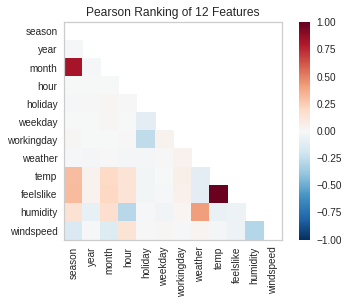

In [12]:
from yellowbrick.features import Rank2D

# 创建特征相关性排名的2D图像
visualizer = Rank2D(algorithm="pearson")
# 转换数据
visualizer.fit_transform(X)
visualizer.show()

以上结果向我们显示了特征对之间的皮尔逊相关性，这样网格中的每个像元都代表了两个特征，这些特征在x和y轴上按顺序标识，并且颜色显示了相关性的大小。皮尔逊相关系数为1.0表示变量对之间存在强的正线性关系，值-1.0表示强的负线性关系（零值表示无关系）。因此，我们正在寻找深红色和深蓝色框以进一步识别。

在此图表中，我们看到这些特征temp与feelslike具有很强的相关性，并且season与month具有很强的相关性。这似乎是有道理的。我们在外面感觉到的表观温度取决于实际温度和其他空气质量因素，而一年中的季节用月份来表示！要深入研究，我们可以使用 直接数据可视化（JointPlotVisualizer）检查这些关系。





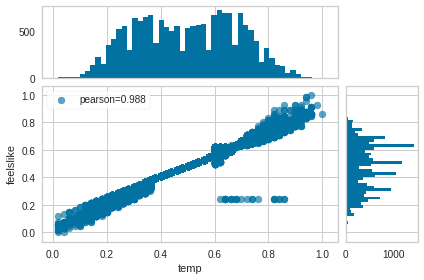

In [13]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(columns=['temp', 'feelslike'])
visualizer.fit_transform(X, y)
visualizer.show()

该可视化工具绘制了y轴上的表观温度feellike和x轴上的实际测量温度的散点图，并使用简单的线性回归绘制了一条最佳拟合线。此外，单变量分布在x轴上方显示为直方图，y轴上显示为feellike。

JointPlotVisualizer可以让您一目了然地看到特性之间非常强的正相关关系，以及每个特性的范围和分布。请注意，轴标注化为0和1之间的空间，这是机器学习中的一种常用技术，用于减少一个特征对另一个特征的影响。

该图非常有趣，因为数据集中似乎存在一些离群值。这些实例可能需要手动删除，以提高最终模型的质量，因为它们可能表示数据输入错误，并有可能在偏斜的数据集上训练模型，这将返回不可靠的模型预测。离群值的第一个实例出现在临时数据中，其feelslike 值大约等于0.25-显示了一条水平的数据线，可能是由输入错误造成的。

我们还可以看到，越极端的温度对感知温度产生了夸张的影响；温度越低，人们就越可能相信它是冷的，温度越高，人们就会感觉到温度越高，一般来说，温和的温度对个人对舒适感的感知影响不大。这给我们提供了一个线索，feellike可能是一个比temp更好的特性，它保证了一个更稳定的数据集，并且运行到异常值或错误的风险更小。

我们可以通过对任一值进行模型训练并对结果进行评分，最终确定假设。如果该temp 值确实不太可靠，则应删除该temp 变量，改为使用feelslike。同时，feelslike 由于没有异常值和输入错误，我们将使用该值。至此，我们可以训练模型了。让我们对模型拟合线性回归并绘制残差。

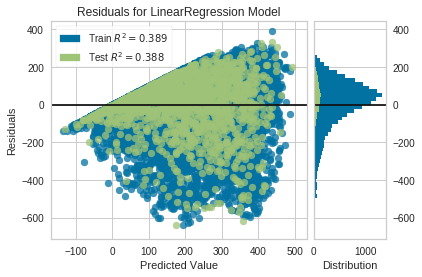

In [14]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1
)

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

残差图显示了预测值（乘客数量）的误差，并允许我们在模型中寻找异方差；例如，目标区域中误差最大的区域。残差的形状可以强烈地告诉我们OLS（普通最小二乘法）受模型组成部分（特征）影响最大的地方。在这种情况下，我们可以看到较低的预测乘客数导致较低的模型误差，反之，较高的预测乘客数导致更高的模型误差。这表明我们的模型在目标的某些区域有更多的噪声，或者两个变量是共线的，这意味着它们随着关系中噪声的变化而注入误差。

残差图还显示了模型是如何注入误差的，残差=0处的粗体水平线是没有误差的，该线上方或下方的任何一点都表示误差的大小。例如，大部分残差都是负数，而且由于分数是按实际期望值计算的，这意味着大多数时候期望值都大于实际值；例如，我们的模型主要是猜测的乘客人数多于实际人数。此外，在残差图的右上角有一个非常有趣的边界，这表明模型空间中有一个有趣的效果；可能某些特征在该模型的区域中被强加权。

最后利用训练集和测试集对残差进行着色。这有助于我们识别创建训练集和测试拆分时的错误。如果测试误差与训练误差不符，那么我们的模型要么过拟合要么欠拟合。否则，在创建拆分之前对数据集进行无序处理可能是一个错误。

在生成残差图的同时，我们还通过对测试数据（例如代码片段）对模型进行“评分”来衡量性能的可视化工具visualizer.score(X_test, y_test)。因为我们使用的是线性回归模型，评分包括找到数据的R平方值，这是一种统计指标，用来衡量数据与拟合回归线的接近程度。任何模型的R平方值在预测/测试运行之间可能略有不同，但通常应具有可比性。在我们的例子中，这个模型的R平方值只有0.328，这意味着线性相关性可能不是最适合用来拟合这些数据的。让我们看看是否可以使用正则化来拟合一个更好的模型，同时探索另一个可视化工具。

在探索模型族时，首先要考虑的是模型如何变得更加复杂。随着模型复杂度的增加，由于模型变得越来越过拟合并且无法泛化为看不见的数据，因此由于方差引起的误差也随之增加。但是，模型越简单，偏差可能导致的误差就越大。该模型是欠拟合的，因此更容易错过目标。因此，大多数机器学习的目标是创建一个足够复杂的模型，找到偏差和方差之间的中间点。

对于线性模型，复杂性来自特征本身以及根据模型分配的权重。因此，线性模型期望获得解释性结果的特征最少。实现此目的的一种技术是正则化，即引入称为alpha的参数，该参数可相互标准化系数的权重并降低复杂度。Alpha与复杂度成反比关系，Alpha越高，模型的复杂度越低，反之亦然。

因此，问题就变成了如何选择Alpha。一种技术是使用交叉验证并选择具有最低误差的alpha来拟合许多模型。该AlphaSelection可视化工具可以让你做到这一点，有一个可视化表示，显示了正规化的行为。如上图所示，随着alpha值的增加，误差减小，直到我们选择的值（在本例中为3.181）开始增加。这使我们能够针对偏差/方差折衷，并探索正则化方法之间的关系（例如Ridge与Lasso）


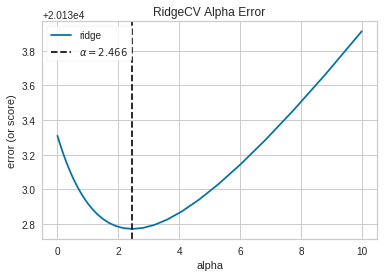

In [15]:
import numpy as np

from sklearn.linear_model import RidgeCV
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1, 200)
visualizer = AlphaSelection(RidgeCV(alphas=alphas))
visualizer.fit(X, y)
visualizer.show()

现在，我们可以训练最终模型并使用可视化工具对其进行PredictionError可视化：



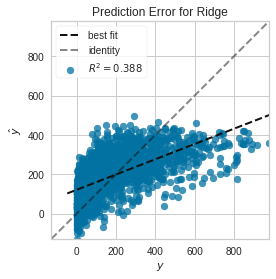

In [16]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(Ridge(alpha=3.181))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

预测误差可视化工具将实际值（测量值）与预期值（预测值）相互比较。黑色浅色虚线是表示训练集和测试集零误差的45度线。和残差图一样，这让我们可以看到误差发生的地方和程度。黑色深色虚线，表示实际的误差曲线。可以看到该模型效果不好。因此还需要进一步选择模型。但是简单的Yellowbrick使用就是这些。

# 2 yellowbrick数据集
Yellowbrick托管了一些UCI机器学习存储库中的数据集，以展示本文档中使用的示例。这些数据集托管在我们的CDN中，必须下载后才能使用。通常，当用户调用数据加载器功能之一时，例如load_bikeshare()，如果尚未在用户计算机上下载数据，则会自动下载该数据。但是，对于开发和测试，或者如果您知道您将在没有Internet访问的情况下工作，那么一次下载所有数据可能会更容易。

下载示例数据集后，可以按以下方式加载和使用它们：
```
from yellowbrick.datasets import load_bikeshare

X, y = load_bikeshare() # returns features and targets for the bikeshare dataset
```

每个数据集都有一个README.md有关数据源，属性和目标以及其他元数据的详细信息。要访问元数据或更精确地控制您的数据访问，可以直接从加载器返回数据集，如下所示：
```
dataset = load_bikeshare(return_dataset=True)
print(dataset.README)

df = dataset.to_dataframe()
df.head()
```

这是Yellowbrick中所有数据集的完整列表，以及与它们最相关的分析任务:
+ Bikeshare：适合回归
+ Concrete：适合回归
+ Credit：适用于分类/聚类
+ Energy：适合回归
+ Game：适合多类别分类
+ Hobbies：适合文本分析/分类
+ Mushroom：适合分类/聚类
+ Occupancy：适合分类
+ Spam：适用于二进制分类
+ Walking：适合时间序列分析/聚类
+ NFL：适合聚类

# 3 参考
[https://www.scikit-yb.org/en/latest/quickstart.html](https://www.scikit-yb.org/en/latest/quickstart.html)